##Naive Bayse Model for IKEDC Band Classification


## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [4]:
dataset = pd.read_csv('ikedc_band_cat_dataset.csv')
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

In [5]:
print(X)

[[18  1  1  0]
 [20  0  1  1]
 [22  1  0  1]
 [16  1  0  0]
 [19  0  1  0]
 [21  1  1  1]
 [17  1  0  1]
 [23  0  1  0]
 [15  1  1  1]
 [18  1  0  1]
 [20  0  1  0]
 [22  1  0  1]
 [16  1  0  0]
 [19  0  1  1]
 [21  1  1  0]
 [17  1  0  0]
 [23  0  1  1]
 [15  1  1  0]
 [18  1  0  1]
 [20  0  1  0]
 [22  1  0  1]
 [16  1  0  0]
 [19  0  1  1]
 [21  1  1  1]
 [17  1  0  0]
 [23  0  1  1]
 [15  1  1  0]
 [18  1  0  1]
 [20  0  1  0]
 [22  1  0  1]
 [16  1  0  0]
 [19  0  1  1]
 [21  1  1  1]
 [17  1  0  0]
 [23  0  1  1]
 [15  1  1  0]
 [18  1  0  1]
 [20  0  1  0]
 [22  1  0  1]
 [16  1  0  0]
 [19  0  1  1]
 [21  1  1  1]
 [17  1  0  0]
 [23  0  1  1]
 [15  1  1  0]
 [18  1  0  1]
 [20  0  1  0]
 [22  1  0  1]
 [16  1  0  0]
 [19  0  1  1]
 [21  1  1  1]
 [17  1  0  0]
 [23  0  1  1]
 [15  1  1  0]
 [18  1  0  1]
 [20  0  1  0]
 [22  1  0  1]
 [16  1  0  0]
 [19  0  1  1]
 [21  1  1  1]
 [17  1  0  0]
 [23  0  1  1]
 [15  1  1  0]
 [18  1  0  1]
 [20  0  1  0]
 [22  1  0  1]
 [16  1  0

In [6]:
print(y)

['E' 'A' 'A' 'E' 'E' 'A' 'E' 'A' 'E' 'E' 'A' 'A' 'E' 'E' 'A' 'E' 'A' 'E'
 'E' 'A' 'A' 'E' 'E' 'A' 'E' 'A' 'E' 'E' 'A' 'A' 'E' 'E' 'A' 'E' 'A' 'E'
 'E' 'A' 'A' 'E' 'E' 'A' 'E' 'A' 'E' 'E' 'A' 'A' 'E' 'E' 'A' 'E' 'A' 'E'
 'E' 'A' 'A' 'E' 'E' 'A' 'E' 'A' 'E' 'E' 'A' 'A' 'E' 'E' 'A' 'E' 'A' 'E'
 'E' 'A' 'A' 'E' 'E' 'A' 'E' 'A' 'E' 'E' 'A' 'A' 'E' 'E' 'A' 'E' 'A' 'E'
 'E' 'A' 'A' 'E' 'E' 'A' 'E' 'A' 'E' 'E' 'A' 'A' 'E' 'E' 'A' 'E' 'A' 'E'
 'E' 'A' 'A' 'E' 'E' 'A' 'E' 'A' 'E' 'E' 'A' 'A' 'E' 'E' 'A' 'E' 'A' 'E'
 'E' 'A' 'A' 'E' 'E' 'A' 'E' 'A' 'E' 'E' 'A' 'A' 'E' 'E' 'A' 'E' 'A' 'E'
 'E' 'A' 'A' 'E' 'E' 'A' 'E' 'A' 'E' 'E' 'A' 'A' 'E' 'E' 'A' 'E' 'A' 'E'
 'E' 'A' 'A' 'E' 'E' 'A' 'E' 'A' 'E' 'E' 'A' 'A' 'E' 'E' 'A' 'E' 'A' 'E'
 'E' 'A' 'A' 'E' 'E' 'A' 'E' 'A' 'E' 'E' 'A' 'A' 'E' 'E' 'A' 'E' 'A' 'E'
 'E' 'A']


##Encoding Categorical data

In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [8]:
print(y)

[1 0 0 1 1 0 1 0 1 1 0 0 1 1 0 1 0 1 1 0 0 1 1 0 1 0 1 1 0 0 1 1 0 1 0 1 1
 0 0 1 1 0 1 0 1 1 0 0 1 1 0 1 0 1 1 0 0 1 1 0 1 0 1 1 0 0 1 1 0 1 0 1 1 0
 0 1 1 0 1 0 1 1 0 0 1 1 0 1 0 1 1 0 0 1 1 0 1 0 1 1 0 0 1 1 0 1 0 1 1 0 0
 1 1 0 1 0 1 1 0 0 1 1 0 1 0 1 1 0 0 1 1 0 1 0 1 1 0 0 1 1 0 1 0 1 1 0 0 1
 1 0 1 0 1 1 0 0 1 1 0 1 0 1 1 0 0 1 1 0 1 0 1 1 0 0 1 1 0 1 0 1 1 0 0 1 1
 0 1 0 1 1 0 0 1 1 0 1 0 1 1 0]


### Splitting the dataset into the Training set and Test set

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [10]:
print(X_train)

[[15  1  1  0]
 [16  1  0  0]
 [15  1  1  0]
 [21  1  1  1]
 [17  1  0  0]
 [18  1  0  1]
 [15  1  1  1]
 [16  1  0  0]
 [20  0  1  0]
 [15  1  1  0]
 [15  1  1  0]
 [23  0  1  1]
 [19  0  1  1]
 [23  0  1  1]
 [21  1  1  1]
 [17  1  0  0]
 [16  1  0  0]
 [23  0  1  1]
 [19  0  1  1]
 [22  1  0  1]
 [21  1  1  1]
 [17  1  0  0]
 [20  0  1  0]
 [20  0  1  0]
 [18  1  0  1]
 [22  1  0  1]
 [18  1  0  1]
 [20  0  1  0]
 [17  1  0  0]
 [21  1  1  1]
 [19  0  1  1]
 [18  1  0  1]
 [22  1  0  1]
 [22  1  0  1]
 [18  1  0  1]
 [15  1  1  0]
 [20  0  1  0]
 [21  1  1  0]
 [18  1  0  1]
 [17  1  0  0]
 [23  0  1  1]
 [20  0  1  0]
 [16  1  0  0]
 [17  1  0  0]
 [18  1  0  1]
 [15  1  1  0]
 [22  1  0  1]
 [21  1  1  1]
 [20  0  1  0]
 [15  1  1  0]
 [23  0  1  1]
 [20  0  1  0]
 [21  1  1  1]
 [20  0  1  0]
 [23  0  1  1]
 [23  0  1  1]
 [19  0  1  1]
 [18  1  0  1]
 [16  1  0  0]
 [19  0  1  1]
 [21  1  1  1]
 [22  1  0  1]
 [21  1  1  1]
 [18  1  1  0]
 [19  0  1  1]
 [22  1  0  1]
 [21  1  1

In [11]:
print(X_test)

[[18  1  0  1]
 [15  1  1  0]
 [15  1  1  0]
 [15  1  1  0]
 [17  1  0  0]
 [22  1  0  1]
 [21  1  1  1]
 [22  1  0  1]
 [16  1  0  0]
 [15  1  1  0]
 [23  0  1  1]
 [15  1  1  0]
 [18  1  0  1]
 [20  0  1  0]
 [15  1  1  0]
 [23  0  1  0]
 [17  1  0  0]
 [19  0  1  1]
 [20  0  1  0]
 [22  1  0  1]
 [16  1  0  0]
 [20  0  1  0]
 [18  1  0  1]
 [17  1  0  0]
 [17  1  0  0]
 [17  1  0  0]
 [15  1  1  0]
 [21  1  1  1]
 [21  1  1  1]
 [15  1  1  0]
 [23  0  1  1]
 [20  0  1  0]
 [17  1  0  0]
 [16  1  0  0]
 [19  0  1  1]
 [18  1  0  1]
 [16  1  0  0]
 [19  0  1  0]
 [22  1  0  1]
 [23  0  1  1]]


In [12]:
print(y_train)

[1 1 1 0 1 1 1 1 0 1 1 0 1 0 0 1 1 0 1 0 0 1 0 0 1 0 1 0 1 0 1 1 0 0 1 1 0
 0 1 1 0 0 1 1 1 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 1 1 0 0 0 0 0 1 1 1 1
 1 1 0 1 1 0 1 1 0 0 0 1 1 1 0 1 1 0 1 1 0 1 1 0 0 0 0 1 1 1 0 0 1 1 1 1 1
 0 1 0 0 1 1 0 0 0 1 0 1 1 0 0 0 0 0 1 0 1 0 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0
 0 0 1 1 1 1 1 1 1 1 0 0]


In [13]:
print(y_test)

[1 1 1 1 1 0 0 0 1 1 0 1 1 0 1 0 1 1 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 1
 1 0 0]


##Feature scaling

In [22]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:, 0:] = sc.fit_transform(X_train[:, 0:])
X_test[:, 0:] = sc.transform(X_test[:, 0:])

In [23]:
print(X_train)

[[-1  0  0 -1]
 [-1  0 -1 -1]
 [-1  0  0 -1]
 [ 0  0  0  0]
 [ 0  0 -1 -1]
 [ 0  0 -1  0]
 [-1  0  0  0]
 [-1  0 -1 -1]
 [ 0 -1  0 -1]
 [-1  0  0 -1]
 [-1  0  0 -1]
 [ 1 -1  0  0]
 [ 0 -1  0  0]
 [ 1 -1  0  0]
 [ 0  0  0  0]
 [ 0  0 -1 -1]
 [-1  0 -1 -1]
 [ 1 -1  0  0]
 [ 0 -1  0  0]
 [ 1  0 -1  0]
 [ 0  0  0  0]
 [ 0  0 -1 -1]
 [ 0 -1  0 -1]
 [ 0 -1  0 -1]
 [ 0  0 -1  0]
 [ 1  0 -1  0]
 [ 0  0 -1  0]
 [ 0 -1  0 -1]
 [ 0  0 -1 -1]
 [ 0  0  0  0]
 [ 0 -1  0  0]
 [ 0  0 -1  0]
 [ 1  0 -1  0]
 [ 1  0 -1  0]
 [ 0  0 -1  0]
 [-1  0  0 -1]
 [ 0 -1  0 -1]
 [ 0  0  0 -1]
 [ 0  0 -1  0]
 [ 0  0 -1 -1]
 [ 1 -1  0  0]
 [ 0 -1  0 -1]
 [-1  0 -1 -1]
 [ 0  0 -1 -1]
 [ 0  0 -1  0]
 [-1  0  0 -1]
 [ 1  0 -1  0]
 [ 0  0  0  0]
 [ 0 -1  0 -1]
 [-1  0  0 -1]
 [ 1 -1  0  0]
 [ 0 -1  0 -1]
 [ 0  0  0  0]
 [ 0 -1  0 -1]
 [ 1 -1  0  0]
 [ 1 -1  0  0]
 [ 0 -1  0  0]
 [ 0  0 -1  0]
 [-1  0 -1 -1]
 [ 0 -1  0  0]
 [ 0  0  0  0]
 [ 1  0 -1  0]
 [ 0  0  0  0]
 [ 0  0  0 -1]
 [ 0 -1  0  0]
 [ 1  0 -1  0]
 [ 0  0  0

In [24]:
print(X_test)

[[ 0  0 -1  0]
 [-1  0  0 -1]
 [-1  0  0 -1]
 [-1  0  0 -1]
 [ 0  0 -1 -1]
 [ 1  0 -1  0]
 [ 0  0  0  0]
 [ 1  0 -1  0]
 [-1  0 -1 -1]
 [-1  0  0 -1]
 [ 1 -1  0  0]
 [-1  0  0 -1]
 [ 0  0 -1  0]
 [ 0 -1  0 -1]
 [-1  0  0 -1]
 [ 1 -1  0 -1]
 [ 0  0 -1 -1]
 [ 0 -1  0  0]
 [ 0 -1  0 -1]
 [ 1  0 -1  0]
 [-1  0 -1 -1]
 [ 0 -1  0 -1]
 [ 0  0 -1  0]
 [ 0  0 -1 -1]
 [ 0  0 -1 -1]
 [ 0  0 -1 -1]
 [-1  0  0 -1]
 [ 0  0  0  0]
 [ 0  0  0  0]
 [-1  0  0 -1]
 [ 1 -1  0  0]
 [ 0 -1  0 -1]
 [ 0  0 -1 -1]
 [-1  0 -1 -1]
 [ 0 -1  0  0]
 [ 0  0 -1  0]
 [-1  0 -1 -1]
 [ 0 -1  0 -1]
 [ 1  0 -1  0]
 [ 1 -1  0  0]]


## Training the Naive Bayes Model on the Training Set

In [25]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

##Predicting a New Result

In [26]:
print(classifier.predict(sc.transform([[22, 1, 0, 1]])))

[0]


##Predicting the Test Results

In [27]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [0 0]]


### Making the Confusion Matrix

In [28]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[15  0]
 [ 3 22]]


0.925

##Visualising the Training Set Results

<ipython-input-39-a2d8c9f9da02>:19: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c=ListedColormap(('red', 'green'))(i), label=j)


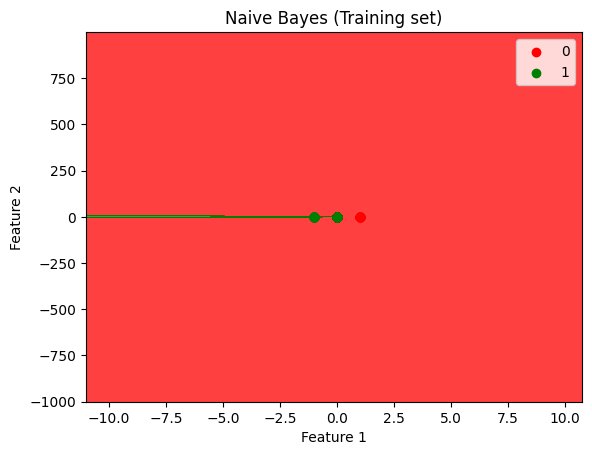

In [39]:
feature1 = 0  # Index of the first feature to visualize
feature2 = 1  # Index of the second feature to visualize
X_set, y_set = X_train[:, [feature1, feature2]], y_train
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 10, stop=X_set[:, 0].max() + 10, step=0.25),
                     np.arange(start=X_set[:, 1].min() - 1000, stop=X_set[:, 1].max() + 1000, step=0.25))
sc_new = StandardScaler()
X1_scaled = sc_new.fit_transform(X1.reshape(-1, 1))  # Pre-compute scaled values
X2_scaled = sc_new.transform(X2.reshape(-1, 1))

# Reshape the input data to include all 4 features used during training
Z = classifier.predict(np.array([X1.ravel(), X2.ravel(), np.zeros_like(X1.ravel()), np.zeros_like(X2.ravel())]).T).reshape(X1.shape)
# The added np.zeros_like() create arrays of zeros with the same shape as X1 and X2 to represent the missing features.
# You might need to adjust how you handle these missing features depending on your specific use case.

plt.contourf(X1, X2, Z, alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c=ListedColormap(('red', 'green'))(i), label=j)
plt.title('Naive Bayes (Training set)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

##Visualising Test Set Results

<ipython-input-40-6e9f305c1692>:19: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c=ListedColormap(('red', 'green'))(i), label=j)


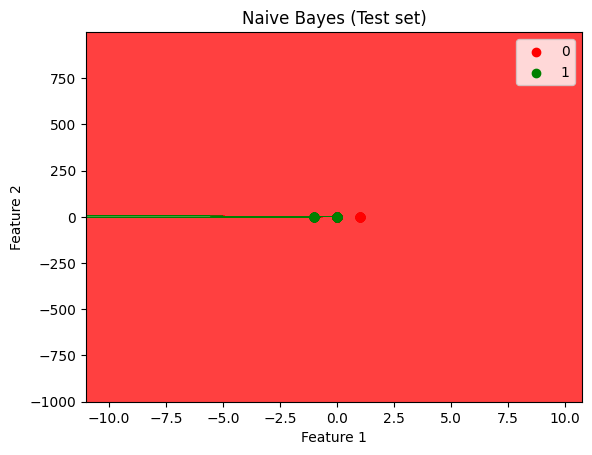

In [40]:
feature1 = 0  # Index of the first feature to visualize
feature2 = 1  # Index of the second feature to visualize
X_set, y_set = X_train[:, [feature1, feature2]], y_train
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 10, stop=X_set[:, 0].max() + 10, step=0.25),
                     np.arange(start=X_set[:, 1].min() - 1000, stop=X_set[:, 1].max() + 1000, step=0.25))
sc_new = StandardScaler()
X1_scaled = sc_new.fit_transform(X1.reshape(-1, 1))  # Pre-compute scaled values
X2_scaled = sc_new.transform(X2.reshape(-1, 1))

# Reshape the input data to include all 4 features used during training
Z = classifier.predict(np.array([X1.ravel(), X2.ravel(), np.zeros_like(X1.ravel()), np.zeros_like(X2.ravel())]).T).reshape(X1.shape)
# The added np.zeros_like() create arrays of zeros with the same shape as X1 and X2 to represent the missing features.
# You might need to adjust how you handle these missing features depending on your specific use case.

plt.contourf(X1, X2, Z, alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c=ListedColormap(('red', 'green'))(i), label=j)
plt.title('Naive Bayes (Test set)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

## Applying k-Fold Cross Validation

In [41]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 87.50 %
Standard Deviation: 8.84 %
